In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# --- When to Use Ordinal Encoding ---
# Ordinal encoding is used to convert categorical features into a numerical format.
# It should only be used when the categorical values have a clear, inherent order or ranking.
# For example: 'Low' < 'Medium' < 'High', or 'Graduate' > 'Undergraduate'.
#
# --- Requirements ---
# - The data must be categorical.
# - The categories must have a meaningful, ranked relationship.
# - You must be able to explicitly define this order.
# Using this method on nominal data (categories with no order, like 'Red', 'Green', 'Blue')
# can mislead a model into thinking there is a relationship that doesn't exist.




In [3]:
# 1. LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# We will use the Breast Cancer Wisconsin dataset.
# We set as_frame=True to load the data directly into a pandas DataFrame.
cancer_data = load_breast_cancer(as_frame=True)
df = cancer_data.frame

# For demonstration, we'll create a new ordinal feature from a continuous one.
# This is a common practice called "binning" or "discretization".
# We'll bin the 'mean radius' feature into three ordered categories.
df['radius_category'] = pd.cut(
    df['mean radius'], 
    bins=3, 
    labels=['Low', 'Medium', 'High']
)

print("--- Original Data with New Ordinal Feature ---")
# Display relevant columns
print(df[['mean radius', 'radius_category']].head())
print("\n")




--- Original Data with New Ordinal Feature ---
   mean radius radius_category
0        17.99          Medium
1        20.57          Medium
2        19.69          Medium
3        11.42             Low
4        20.29          Medium




In [4]:
# 2. SELECT THE FEATURE AND DEFINE THE ORDER
# We select the 'radius_category' column to encode.
# It's crucial to define the order of the categories from smallest to largest.
category_order = ['Low', 'Medium', 'High']




In [5]:
# 3. APPLY ORDINAL ENCODING
# Initialize the OrdinalEncoder with our specified order.
# The 'categories' parameter is a list of lists; one list for each feature being encoded.
ordinal_encoder = OrdinalEncoder(categories=[category_order])

# Apply the encoder to the 'radius_category' column.
# Note: The encoder expects a 2D array, so we use [['radius_category']].
df['category_encoded'] = ordinal_encoder.fit_transform(df[['radius_category']])




In [6]:
# 4. SHOW THE RESULT
# Print the head of the DataFrame to compare the original and encoded columns.
print("--- DataFrame After Ordinal Encoding ---")
print(df[['mean radius', 'radius_category', 'category_encoded']].head())
print("\n")

# Let's see the mapping the encoder learned.
print("--- Encoder Mapping ---")
for i, category in enumerate(ordinal_encoder.categories_[0]):
    print(f"'{category}' -> {float(i)}")
print("\n")




--- DataFrame After Ordinal Encoding ---
   mean radius radius_category  category_encoded
0        17.99          Medium               1.0
1        20.57          Medium               1.0
2        19.69          Medium               1.0
3        11.42             Low               0.0
4        20.29          Medium               1.0


--- Encoder Mapping ---
'Low' -> 0.0
'Medium' -> 1.0
'High' -> 2.0




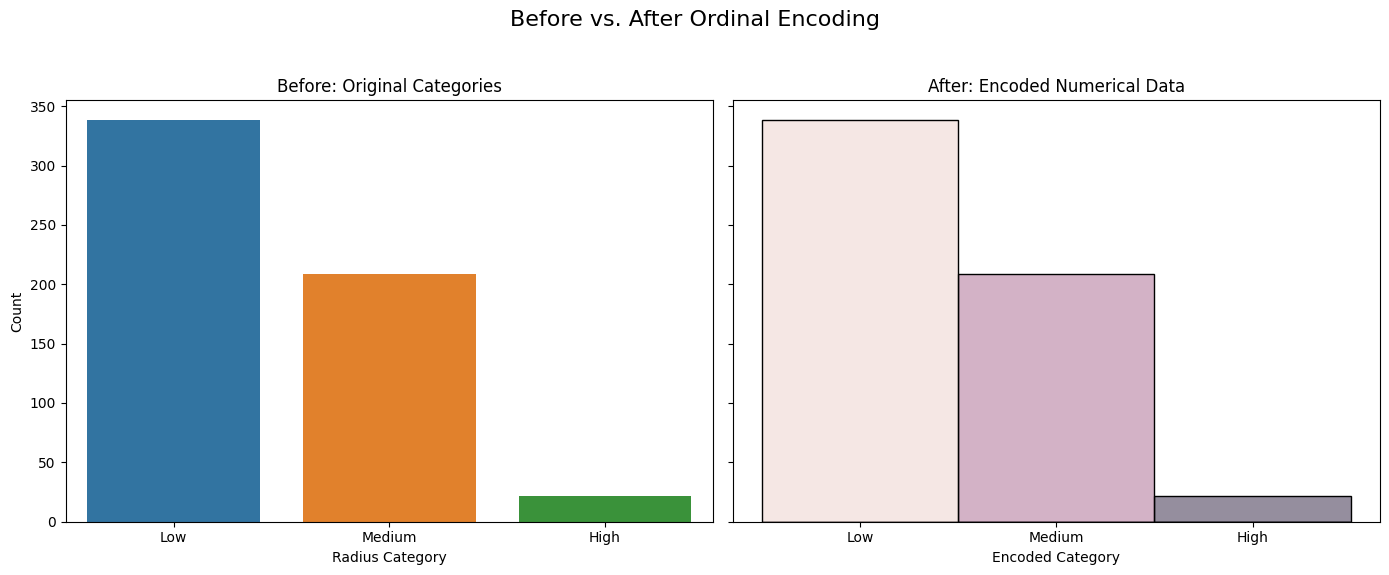

In [10]:
# 5. CREATE A BEFORE-AND-AFTER VISUALIZATION
# This helps to confirm that the distribution is preserved, only the labels have changed.

# Set up the plotting area
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('Before vs. After Ordinal Encoding', fontsize=16)

# Before: A count plot of the original categorical data
sns.countplot(ax=axes[0], x='radius_category', data=df, order=category_order, hue= 'radius_category', legend=False)
axes[0].set_title('Before: Original Categories')
axes[0].set_xlabel('Radius Category')
axes[0].set_ylabel('Count')

# After: A histogram of the new numerical data
# We use a histogram here because the encoded data is now numeric.
sns.histplot(ax=axes[1], data=df, x='category_encoded', bins=len(category_order), kde=False, hue='category_encoded', discrete=True, legend=False)
axes[1].set_title('After: Encoded Numerical Data')
axes[1].set_xlabel('Encoded Category')
# Set custom x-ticks to show the mapping
axes[1].set_xticks(range(len(category_order)))
axes[1].set_xticklabels(category_order)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()